In [51]:
!free -h

               total        used        free      shared  buff/cache   available
Mem:            50Gi       7.0Gi        39Gi       586Mi       4.3Gi        42Gi
Swap:             0B          0B          0B


In [1]:
!nvidia-smi

Sat Dec 23 21:27:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            On   | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     7W /  75W |      0MiB /  7680MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

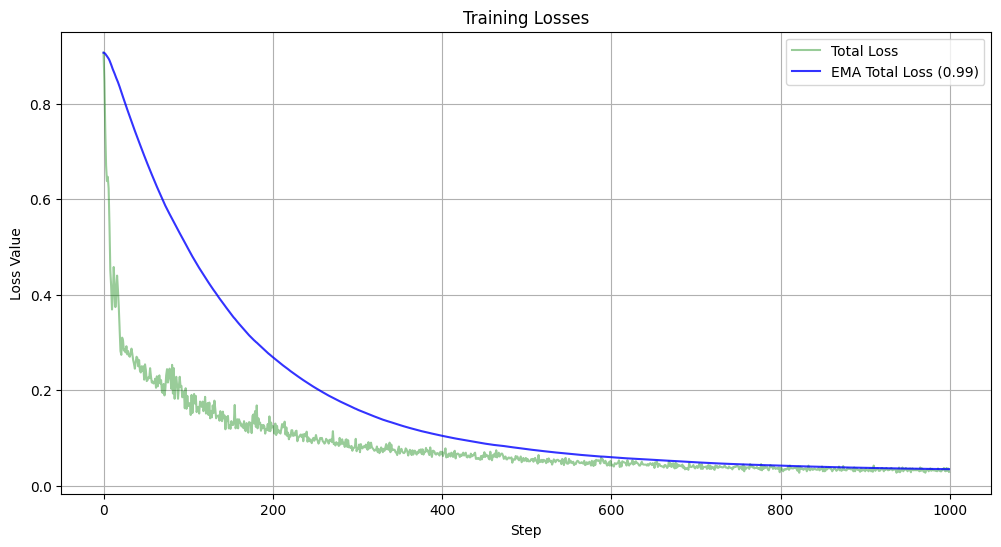

In [4]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Pattern to match lines in the log file
loss_pattern = re.compile(r'\[\d+, +(\d+)\] loss: ([\d.]+)')

# Lists to store the extracted data
steps = []
total_losses = []
class_losses = []
patch_losses = []
class_entropies = []
mean_koleo_distances = []

# file_path = 'logs/vit_mim/fold_0.txt'
# file_path = 'logs/vit_mim_upscale/fold_0.txt'
# file_path = 'logs/vit_mim_upscale_finetune/fold_0.txt'
# file_path = 'logs/vit_base_pretrained/fold_3.txt'
# file_path = 'logs/eva02_base/fold_1.txt'
# file_path = 'logs/eva02_global_attention/first_try.txt'
# file_path = 'logs/eva02_global_attention/second_try.txt'
# file_path = 'logs/eva02_global_attention/third_try.txt'
# file_path = 'logs/eva02_global_attention/fourth_try.txt'
file_path = 'logs/eva02_global_attention/fifth_try.txt'
# file_path = 'logs/eva02_global_attention/sixth_try.txt'
# file_path = 'logs/eva02_global_attention/seventh_try.txt'

# Reading and parsing the file
with open(file_path, 'r') as file:
    for line in file:
        loss_match = loss_pattern.match(line)
        if loss_match:
            step, total_loss = map(float, loss_match.groups())
            steps.append(step)
            total_losses.append(total_loss)

# Function to calculate EMA
def calculate_ema(data, weight_decay):
    ema_data = []
    ema = data[0]
    for value in data:
        ema = weight_decay * ema + (1 - weight_decay) * value
        ema_data.append(ema)
    return ema_data

# Calculate EMA for each loss type
weight_decay = 0.99 # adjustable momentum parameter
ema_total_losses = calculate_ema(total_losses, weight_decay)

# Creating a DataFrame
loss_data = pd.DataFrame({
    'Step': steps,
    'Total Loss': total_losses,
    'EMA Total Loss': ema_total_losses,
})

loss_data = loss_data.iloc[:1000]

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(loss_data['Step'], loss_data['Total Loss'], label='Total Loss', alpha=0.4, color='green')
plt.plot(loss_data['Step'], loss_data['EMA Total Loss'], label=f'EMA Total Loss ({weight_decay})', alpha=0.8, color='blue')
plt.xlabel('Step')
plt.ylabel('Loss Value')
# plt.ylim(0, 0.25)
# plt.xlim(5000, len(loss_data))
plt.title('Training Losses')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
loss_data

,Step,Total Loss,EMA Total Loss
0,0.0,0.907,0.907000
1,1.0,0.847,0.906400
2,2.0,0.748,0.904816
3,3.0,0.671,0.902478
4,4.0,0.638,0.899833
...,...,...,...
995,995.0,0.030,0.034518
996,996.0,0.037,0.034543
997,997.0,0.031,0.034507
998,998.0,0.036,0.034522


In [3]:
loss_data.iloc[-25:].mean()

Step              1332.000000
Total Loss           0.031360
EMA Total Loss       0.032347
dtype: float64